### Loading and investigation of data

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
!chcp 65001
!dir

Active code page: 65001
 Volume in drive C is Windows
 Volume Serial Number is E26C-6D7C

 Directory of C:\Users\Nikita\Documents\IncaDigital

01.12.2020  10:17    <DIR>          .
01.12.2020  10:17    <DIR>          ..
01.12.2020  10:16    <DIR>          .ipynb_checkpoints
25.11.2020  12:05         1В 382В 268 2015.csv
25.11.2020  12:32         6В 838В 397 2016.csv
25.11.2020  12:48         4В 963В 512 2017.csv
01.12.2020  10:15    <DIR>          Bitcoin-large-transactions-2015_2016_2017
21.09.2020  13:24           677В 189 download_bank_connections.csv
01.12.2020  10:15    <DIR>          download_data_fincen_files
19.09.2020  20:12         1В 080В 006 download_transactions_map.csv
01.12.2020  10:17               796 IncaDigital_task.ipynb
30.11.2020  18:00           314В 407 Task.PNG
               7 File(s)     15В 256В 575 bytes
               5 Dir(s)  559В 548В 149В 760 bytes free


In [11]:
BANK_CONNECTIONS_PATH = '.\download_bank_connections.csv'
TRANSACTION_MAP_PATH = '.\download_transactions_map.csv'
BITCOIN_2015_PATH = '.\\2015.csv'
BITCOIN_2016_PATH = '.\\2016.csv'
BITCOIN_2017_PATH = '.\\2017.csv'

In [64]:
bank_connect = pd.read_csv(BANK_CONNECTIONS_PATH, sep=',')
trans_map = pd.read_csv(TRANSACTION_MAP_PATH, sep=',')
bitcoin_2015 = pd.read_csv(BITCOIN_2015_PATH, sep=',')
bitcoin_2016 = pd.read_csv(BITCOIN_2016_PATH, sep=',')
bitcoin_2017 = pd.read_csv(BITCOIN_2017_PATH, sep=',')

In [15]:
bank_connect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498 entries, 0 to 5497
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   icij_sar_id        5498 non-null   int64 
 1   filer_org_name_id  5498 non-null   object
 2   filer_org_name     5498 non-null   object
 3   entity_b_id        5498 non-null   object
 4   entity_b           5498 non-null   object
 5   entity_b_country   5498 non-null   object
 6   entity_b_iso_code  5498 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.8+ KB


In [23]:
bank_connect.describe(include='all')

,icij_sar_id,filer_org_name_id,filer_org_name,entity_b_id,entity_b,entity_b_country,entity_b_iso_code
count,5498.000000,5498,5498,5498,5498,5498,5498
unique,NaN,15,15,2197,1829,141,141
top,NaN,deutsche-bank-ag,Deutsche Bank AG,credit-suisse-ag-zurich-switzerland-che,Deutsche Bank AG,Russia,RUS
freq,NaN,2760,2760,71,161,644,644
mean,3308.730084,NaN,NaN,NaN,NaN,NaN,NaN
std,653.180011,NaN,NaN,NaN,NaN,NaN,NaN
min,2208.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2665.250000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3431.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3859.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
bank_connect.sample(10)

,icij_sar_id,filer_org_name_id,filer_org_name,entity_b_id,entity_b,entity_b_country,entity_b_iso_code
3051,2644,deutsche-bank-ag,Deutsche Bank AG,apicorp-bahrain-project-finance-bahrain-bhr,Apicorp Bahrain Project Finance,Bahrain,BHR
5354,2589,deutsche-bank-ag,Deutsche Bank AG,korea-exchange-bank-south-korea-kor,Korea Exchange Bank,South Korea,KOR
533,2652,deutsche-bank-ag,Deutsche Bank AG,sberbank-russia-rus,Sberbank,Russia,RUS
832,3482,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,efg-bank-zurich-switzerland-che,EFG Bank,Switzerland,CHE
3016,3666,deutsche-bank-ag,Deutsche Bank AG,natl-bk-for-foreign-economic-activi-uzbekistan...,Natl Bk For Foreign Economic Activi,Uzbekistan,UZB
111,2338,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,marfin-popular-bank-public-co-ltd-nicosia-cypr...,Marfin Popular Bank Public Co Ltd,Cyprus,CYP
1898,4087,deutsche-bank-ag,Deutsche Bank AG,korea-exchange-bank-panama-pan,Korea Exchange Bank,Panama,PAN
2784,2416,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,zenith-bank-plc-lagos-nigeria-nga,Zenith Bank Plc,Nigeria,NGA
753,3053,jp-morgan-chase-co,JP Morgan Chase & Co.,bank-of-communications-co-ltd-china-chn,"Bank of Communications Co., Ltd.",China,CHN
3040,3690,deutsche-bank-ag,Deutsche Bank AG,nordea-bank-finland-plc-finland-fin,Nordea Bank Finland Plc,Finland,FIN


In [24]:
trans_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4507 non-null   int64  
 1   icij_sar_id               4507 non-null   int64  
 2   filer_org_name_id         4507 non-null   object 
 3   filer_org_name            4507 non-null   object 
 4   begin_date                4501 non-null   object 
 5   end_date                  4501 non-null   object 
 6   originator_bank_id        4507 non-null   object 
 7   originator_bank           4507 non-null   object 
 8   originator_bank_country   4507 non-null   object 
 9   originator_iso            4507 non-null   object 
 10  beneficiary_bank_id       4507 non-null   object 
 11  beneficiary_bank          4507 non-null   object 
 12  beneficiary_bank_country  4507 non-null   object 
 13  beneficiary_iso           4507 non-null   object 
 14  number_t

In [25]:
trans_map.describe(include='all')

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
count,4507.000000,4507.000000,4507,4507,4501,4501,4507,4507,4507,4507,4507,4507,4507,4507,4396.000000,4.507000e+03
unique,NaN,NaN,26,26,1762,1751,892,969,119,117,1392,1113,111,107,NaN,NaN
top,NaN,NaN,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Apr 3, 2014","Sep 30, 2014",ltb-bank,LTB Bank,Latvia,LVA,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Latvia,LVA,NaN,NaN
freq,NaN,NaN,3442,3442,25,29,156,154,823,823,245,256,499,499,NaN,NaN
mean,233598.417351,3046.542933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.129436,7.917073e+06
std,5836.150684,645.354556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.892107,5.312478e+07
min,223254.000000,2208.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.180000e+00
25%,228068.500000,2441.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.704167e+04
50%,234944.000000,2905.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.950000e+05
75%,238380.000000,3461.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.813811e+06


In [26]:
trans_map.sample(10)

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
1888,233097,3419,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Nov 7, 2016","Dec 20, 2016",pershing-llc,Pershing Llc,United States,USA,kbl-european-private-bankers-sa-luxembourg-lux...,Kbl European Private Bankers SA,Luxembourg,LUX,3.0,20270988.09
2946,237484,3240,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Apr 2, 2014","May 5, 2014",bdo-unibank-inc,Bdo Unibank Inc,Philippines,PHL,dbs-bank-hong-kong-ltd-hong-kong-hkg,DBS Bank,Hong Kong,HKG,5.0,2600190.00
2891,237277,4121,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Sep 18, 2013","Sep 20, 2013",baltikums-bank,Baltikums Bank,Latvia,LVA,dbs-bank-ltd-singapore-sgp,DBS Bank Ltd,Singapore,SGP,2.0,882720.00
2286,235021,3935,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Nov 20, 2013","Nov 20, 2013",sberbank-switzerland-ag,Sberbank Switzerland AG,Switzerland,CHE,vp-bank-luxembourg-sa-luxembourg-lux,VP Bank,Luxembourg,LUX,1.0,17000000.00
4317,242135,2912,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 10, 2008","Jun 10, 2008",caledonian-bank-ltd,Caledonian Bank Ltd,Cayman Islands,CYM,citibank-na-ny-ny-usa,Citibank N.A.,United States,USA,1.0,24000000.00
1140,228085,3266,standard-chartered-plc,Standard Chartered Plc,"Mar 18, 2014","Aug 28, 2014",bank-of-saint-lucia-intl-ltd,Bank of Saint Lucia Intl Ltd,Saint Lucia,LCA,standard-chartered-bank-hong-kong-limited-hong...,Standard Chartered Bank Hong Kong Limited,Hong Kong,HKG,3.0,499048.76
2863,237112,3525,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Apr 2, 2014","May 28, 2014",amsterdam-trade-bank-nv,Amsterdam Trade Bank NV,Netherlands,NLD,seb-bank-tallinn-estonia-est,SEB Bank,Estonia,EST,32.0,5868974.00
3405,238470,3040,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 2, 2014","Aug 12, 2014",banque-sahelo-saharienne-pour-linvestissement-...,Banque Sahelo-Saharienne Pour L'Investissement...,Niger,NER,dbs-bank-ltd-singapore-sgp,DBS Bank Ltd,Singapore,SGP,3.0,759898.00
2985,237605,2451,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Nov 7, 2014","Dec 30, 2014",norvik-banka,Norvik Banka,Latvia,LVA,national-settlement-depository-moscow-russia-rus,National Settlement Depository,Russia,RUS,5.0,72000000.00
660,226198,3988,standard-chartered-plc,Standard Chartered Plc,"Oct 7, 2011","Oct 18, 2011",hellenic-bank,Hellenic Bank,Cyprus,CYP,standard-chartered-bank-dubai-uae-are,Standard Chartered Bank,United Arab Emirates,ARE,2.0,220174.00


In [27]:
bitcoin_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8107 non-null   object 
 1   Sender                  8107 non-null   object 
 2   Receiver                8107 non-null   object 
 3   Transaction_amount      8107 non-null   float64
 4   Price                   8107 non-null   float64
 5   Transaction_amount_USD  8107 non-null   float64
dtypes: float64(3), object(3)
memory usage: 380.1+ KB


In [28]:
bitcoin_2015.describe(include='all')

,time,Sender,Receiver,Transaction_amount,Price,Transaction_amount_USD
count,8107,8107,8107,8107.000000,8107.000000,8.107000e+03
unique,306,7711,7735,NaN,NaN,NaN
top,2015-12-06,3A1KUd5H4hBEHk4bZB4C3hGgvuXuVX7p7t,3KgtbGgaX2ngstNpvyv7LwpHSweVeqGbpM,NaN,NaN,NaN
freq,446,36,39,NaN,NaN,NaN
mean,NaN,NaN,NaN,6275.972340,366.141324,2.179008e+06
std,NaN,NaN,NaN,5887.015573,77.849821,1.885056e+06
min,NaN,NaN,NaN,2500.000126,202.191840,1.000287e+06
25%,NaN,NaN,NaN,3604.938289,284.856272,1.337504e+06
50%,NaN,NaN,NaN,4488.861005,380.885312,1.618408e+06
75%,NaN,NaN,NaN,5812.574079,438.581185,1.980304e+06


In [29]:
bitcoin_2015.sample(10)

,time,Sender,Receiver,Transaction_amount,Price,Transaction_amount_USD
6217,2015-11-12,1KY6jXVgci2JaXajdKwwKkdVcYuiWc7F2k,181a241Xg8n4NWgDmabjUsAuZvJTshxHS7,3517.085822,324.823472,1.142432e+06
6484,2015-11-09,1CCtp6yMcXarrXra9t4jcD4QQNbAvuqqpL,1ARqJQ1A1obBE3a41tLPzKjyzsrSLygBf,6364.300935,375.251777,2.388215e+06
2460,2015-12-17,13bPuRuB9tnNYJ5A1YPxtP7XmhSebsdybY,1LsGwR4TZQ7aZdiqVVatchEBLoouWwgkDX,3584.233818,455.812474,1.633738e+06
6208,2015-11-12,1MPCo2NyeGHiZizcMhFxAjDSq8eFnoDnjQ,1GR3riyUMocyPWSnPmD3XAa8znP8BtBFad,3457.527853,324.823472,1.123086e+06
6067,2015-11-14,1HSoanTZYuu5FdER7zXzuanS6zkJnLYKi5,1PMamFk7piTrcPUEqUAra2WGJ9bt5jSb6A,4784.019013,333.986380,1.597797e+06
4126,2015-12-09,14HGEynzeyfq67rEqfGBwxRaxunefLknvk,13Xu6pNzJWssucv487eLKfsfRWkb1Px1LZ,4250.162632,415.413750,1.765576e+06
1709,2015-12-21,15Sht5RgfYaDnhmX13cGBWrWNDw3CchpS5,1uM6oYCAoPHTDVgXLgzbXbcxMhSw8ZDGF,3700.367931,438.426585,1.622340e+06
5608,2015-11-30,35DVAzDtZDKAU94kFT9sxoscnuLCTxgwYc,3GpGgT3sFxcBtt6JZRG3Kn7N4JfmsszXy6,5045.996624,375.616632,1.895360e+06
1262,2015-07-09,1JcoJqXgBaGkuP3tdR7aCGth3iWGQi8tss\n19VttBVoGv...,17862TFJPjgvybGQKK7ZEZWzfqYo8KThuy,5000.000000,269.338264,1.346691e+06
2066,2015-12-19,1JTrHPmRdJ9DXCs6Q62ZzYz93mcKJNqPeL,1GvCNXpPV2ekTKjoCvKtTe3PNWibqyzvjf,3239.571625,463.054255,1.500097e+06


In [36]:
bank_connect.shape, trans_map.shape

((5498, 7), (4507, 16))

In [37]:
bank_connect.columns, trans_map.columns

(Index(['icij_sar_id', 'filer_org_name_id', 'filer_org_name', 'entity_b_id',
        'entity_b', 'entity_b_country', 'entity_b_iso_code'],
       dtype='object'),
 Index(['id', 'icij_sar_id', 'filer_org_name_id', 'filer_org_name',
        'begin_date', 'end_date', 'originator_bank_id', 'originator_bank',
        'originator_bank_country', 'originator_iso', 'beneficiary_bank_id',
        'beneficiary_bank', 'beneficiary_bank_country', 'beneficiary_iso',
        'number_transactions', 'amount_transactions'],
       dtype='object'))

In [40]:
bank_connect['icij_sar_id'].value_counts, trans_map['icij_sar_id'].value_counts

(<bound method IndexOpsMixin.value_counts of 0       4132
 1       3181
 2       3181
 3       3181
 4       3181
         ... 
 5493    2813
 5494    2804
 5495    2804
 5496    2804
 5497    2804
 Name: icij_sar_id, Length: 5498, dtype: int64>,
 <bound method IndexOpsMixin.value_counts of 0       3297
 1       3297
 2       2924
 3       2924
 4       2924
         ... 
 4502    2804
 4503    2804
 4504    2804
 4505    2804
 4506    2804
 Name: icij_sar_id, Length: 4507, dtype: int64>)

In [68]:
sar = pd.merge(bank_connect, trans_map, how='left', on='icij_sar_id')
sar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28020 entries, 0 to 28019
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   icij_sar_id               28020 non-null  int64  
 1   filer_org_name_id_x       28020 non-null  object 
 2   filer_org_name_x          28020 non-null  object 
 3   entity_b_id               28020 non-null  object 
 4   entity_b                  28020 non-null  object 
 5   entity_b_country          28020 non-null  object 
 6   entity_b_iso_code         28020 non-null  object 
 7   id                        24610 non-null  float64
 8   filer_org_name_id_y       24610 non-null  object 
 9   filer_org_name_y          24610 non-null  object 
 10  begin_date                24586 non-null  object 
 11  end_date                  24586 non-null  object 
 12  originator_bank_id        24610 non-null  object 
 13  originator_bank           24610 non-null  object 
 14  origin

In [66]:
sar.sample()

,icij_sar_id,filer_org_name_id_x,filer_org_name_x,entity_b_id,entity_b,entity_b_country,entity_b_iso_code,id,filer_org_name_id_y,filer_org_name_y,...,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
5711,3107,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,cimb-bank-berhad-kuala-lumpur-malaysia-mys,CIMB Bank Berhad,Malaysia,MYS,224182.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,...,maiwand-bank,Maiwand Bank,Afghanistan,AFG,nurbank-jsc-almaty-kazakhstan-kaz,Nurbank JSC,Kazakhstan,KAZ,8.0,318990.0


In [69]:
trans_map.head()

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,5.689852e+07
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,1.162384e+08
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,5.000000e+03
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,9.990000e+03
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,1.200000e+04


In [70]:
bank_connect.head()

,icij_sar_id,filer_org_name_id,filer_org_name,entity_b_id,entity_b,entity_b_country,entity_b_iso_code
0,4132,standard-chartered-plc,Standard Chartered Plc,habib-metropolitan-bank-limited-karachi-pakist...,Habib Metropolitan Bank Limited,Pakistan,PAK
1,3181,standard-chartered-plc,Standard Chartered Plc,standard-chartered-bank-dubai-uae-are,Standard Chartered Bank,United Arab Emirates,ARE
2,3181,standard-chartered-plc,Standard Chartered Plc,al-rostamani-international-exchange-uae-are,Al Rostamani International Exchange,United Arab Emirates,ARE
3,3181,standard-chartered-plc,Standard Chartered Plc,kuwait-turkish-participation-bank-inc-istanbul...,Kuwait Turkish Participation Bank Inc,Turkey,TUR
4,3181,standard-chartered-plc,Standard Chartered Plc,wall-street-exchange-center-llc-dubai-uae-are,Wall Street Exchange Center Llc,United Arab Emirates,ARE


In [81]:
trans_map['begin_date'] = pd.to_datetime(trans_map['begin_date'], format="%b %d, %Y")
trans_map['end_date'] = pd.to_datetime(trans_map['end_date'], format="%b %d, %Y")
trans_map.head()

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-25,2015-09-25,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,5.689852e+07
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-30,2015-09-25,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,1.162384e+08
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-07-05,2012-07-05,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,5.000000e+03
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-06-20,2012-06-20,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,9.990000e+03
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-31,2012-05-31,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,1.200000e+04


In [84]:
bitcoin_2015['time'] = pd.to_datetime(bitcoin_2015['time'])
bitcoin_2016['time'] = pd.to_datetime(bitcoin_2016['time'])
bitcoin_2017['time'] = pd.to_datetime(bitcoin_2017['time'])

In [307]:
bitcoin_2015.shape, bitcoin_2016.shape, bitcoin_2017.shape

((8107, 6), (43247, 6), (9783, 6))

In [346]:
bitcoin = pd.concat([bitcoin_2015, bitcoin_2016, bitcoin_2017], axis=0)
bitcoin.shape

(61137, 6)

### Searching of suspicious activities

In [536]:
def sa_search(trans_map, bitcoin, years, delta_days=3, delta_money=0.05):
    """
    Method finding suspicious activities by comparing 'transaction_map' from FinCEN SAR
    and 'bitcoin' dataset with cryptocurrency transations.
    :trans_map:   DataFrame // bank transactions
    :bitcoin:     DataFrame // cryptocurrency dataframe
    :years:       list      // considering years of suspicious activities investigation
    :delta_days:  int       // considering days of buing cryptocurrency after suspicious activity in bank
    :delta_money: float     // window of money amount (+/- fracture)
    """
    sar = pd.DataFrame({}, columns=np.hstack((trans_map.columns, bitcoin.columns)))
    for year in years:
        lines = trans_map.loc[(((trans_map['end_date'].dt.year==(year-1)) & (trans_map['end_date'].dt.month==12)) |
                              (trans_map['end_date'].dt.year==year)) |
                              (((trans_map['begin_date'].dt.year==(year-1)) & (trans_map['begin_date'].dt.month==12)) |
                              (trans_map['begin_date'].dt.year==year)), :].index
        bitcoin_year = bitcoin.loc[(bitcoin['time'].dt.year==year), :]

        for line in lines:
            bitcoin_data = bitcoin_year.loc[(bitcoin_year['Transaction_amount_USD'] > (1 - delta_money) * trans_map.loc[line, 'amount_transactions']) &
                                            (bitcoin_year['Transaction_amount_USD'] < (1 + delta_money) * trans_map.loc[line, 'amount_transactions']) &
                                            ((
                                                ((bitcoin_year['time'].dt.date - trans_map.loc[line, 'end_date'].to_pydatetime().date()).dt.days <= delta_days) &
                                                ((bitcoin_year['time'].dt.date - trans_map.loc[line, 'end_date'].to_pydatetime().date()).dt.days >= 0)
                                            ) |
                                            (
                                                ((bitcoin_year['time'].dt.date - trans_map.loc[line, 'begin_date'].to_pydatetime().date()).dt.days <= delta_days) &
                                                ((bitcoin_year['time'].dt.date - trans_map.loc[line, 'begin_date'].to_pydatetime().date()).dt.days >= 0)
                                            )), :]
            if not bitcoin_data.empty:
                for column in trans_map.columns:
                    bitcoin_data[column] = trans_map.loc[line, column]
                sar = pd.concat([sar, bitcoin_data], axis=0)
    # columns order for convinient comparision date and amount of transactions
    columns_order = ['id', 'icij_sar_id', 'originator_bank_id', 'originator_bank', 'originator_bank_country', 'originator_iso', 'number_transactions',
                 'filer_org_name_id', 'filer_org_name', 'beneficiary_bank_id', 'beneficiary_bank', 'beneficiary_bank_country', 'beneficiary_iso',
                 'Transaction_amount', 'Price', 'Sender', 'Receiver', 'begin_date', 'end_date', 'time',
                 'Transaction_amount_USD', 'amount_transactions']    
    return sar[columns_order]

In [537]:
sar = sa_search(trans_map, bitcoin, years=[2015, 2016, 2017], delta_days=4, delta_money=0.05)

In [538]:
sar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8749 entries, 60 to 9763
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        8749 non-null   object        
 1   icij_sar_id               8749 non-null   object        
 2   originator_bank_id        8749 non-null   object        
 3   originator_bank           8749 non-null   object        
 4   originator_bank_country   8749 non-null   object        
 5   originator_iso            8749 non-null   object        
 6   number_transactions       8749 non-null   float64       
 7   filer_org_name_id         8749 non-null   object        
 8   filer_org_name            8749 non-null   object        
 9   beneficiary_bank_id       8749 non-null   object        
 10  beneficiary_bank          8749 non-null   object        
 11  beneficiary_bank_country  8749 non-null   object        
 12  beneficiary_iso    

In [539]:
sar['Delta_end_time'] = sar['time'] - sar['end_date']
sar['Delta_begin_time'] = sar['time'] - sar['begin_date']
sar['Delta_time'] = sar[['Delta_end_time', 'Delta_begin_time']].abs().min(axis=1)
sar.drop(columns=['Delta_end_time', 'Delta_begin_time'], inplace=True)
sar['Delta_amount'] = sar['Transaction_amount_USD'] - sar['amount_transactions']

In [540]:
sar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8749 entries, 60 to 9763
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   id                        8749 non-null   object         
 1   icij_sar_id               8749 non-null   object         
 2   originator_bank_id        8749 non-null   object         
 3   originator_bank           8749 non-null   object         
 4   originator_bank_country   8749 non-null   object         
 5   originator_iso            8749 non-null   object         
 6   number_transactions       8749 non-null   float64        
 7   filer_org_name_id         8749 non-null   object         
 8   filer_org_name            8749 non-null   object         
 9   beneficiary_bank_id       8749 non-null   object         
 10  beneficiary_bank          8749 non-null   object         
 11  beneficiary_bank_country  8749 non-null   object         
 12  benef

In [541]:
sar.describe()

,number_transactions,Transaction_amount,Price,Transaction_amount_USD,amount_transactions,Delta_time,Delta_amount
count,8749.000000,8749.000000,8749.000000,8.749000e+03,8.749000e+03,8749,8749.000000
mean,3.606812,5088.107867,441.759564,2.116183e+06,2.117035e+06,2 days 11:35:53.251800205,-851.647679
std,4.106262,3217.719025,144.080481,1.252892e+06,1.273141e+06,1 days 08:46:16.890450556,74948.602700
min,1.000000,982.021004,202.191840,1.000150e+06,9.759650e+05,0 days 00:00:00,-751368.500000
25%,2.000000,3194.729441,388.021166,1.424570e+06,1.426723e+06,1 days 00:00:00,-42429.726000
50%,2.000000,4593.440170,391.245226,1.809740e+06,1.838624e+06,3 days 00:00:00,3500.579140
75%,3.000000,5604.556579,397.442857,2.608877e+06,2.598750e+06,4 days 00:00:00,44819.543220
max,83.000000,100000.000000,1242.950000,2.476781e+07,2.550000e+07,4 days 00:00:00,518665.070040


In [542]:
sar

,id,icij_sar_id,originator_bank_id,originator_bank,originator_bank_country,originator_iso,number_transactions,filer_org_name_id,filer_org_name,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,Transaction_amount,Price,Sender,Receiver,begin_date,end_date,time,Transaction_amount_USD,amount_transactions,Delta_time,Delta_amount
60,224057,3575,unicredit-bank-cjsc,"UniCredit Bank, Cjsc",Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Switzerland,CHE,6041.519003,277.305972,1EjcFUsTxw2KF3xXp4NonW2vneiUqhDrLD,14cyGuNfsAdjbR121uHgDsgCraiVH4bQt8,2015-03-18,2015-03-18,2015-03-18,1.675349e+06,1762600.00,0 days,-87250.702270
61,224057,3575,unicredit-bank-cjsc,"UniCredit Bank, Cjsc",Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Switzerland,CHE,6141.519003,277.305972,1LiMR574sLv8PKMBtc5B8JpE3amdPaEGKD,1EjcFUsTxw2KF3xXp4NonW2vneiUqhDrLD,2015-03-18,2015-03-18,2015-03-18,1.703080e+06,1762600.00,0 days,-59520.105100
62,224057,3575,unicredit-bank-cjsc,"UniCredit Bank, Cjsc",Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Switzerland,CHE,6441.519003,277.305972,1K8zng6mVLDun5AxfmFyn3PTqmPMiYim1Z,18bntxdhKoWR8zJtX86ZyjcouyXuiHzaCw,2015-03-18,2015-03-18,2015-03-18,1.786272e+06,1762600.00,0 days,23671.686420
63,224057,3575,unicredit-bank-cjsc,"UniCredit Bank, Cjsc",Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Switzerland,CHE,6641.519003,277.305972,16hcX3wRuPboeLvk6PHfdUJXxsvrgxk8hX,1EuZNwwbnJbJ4psvM5KH1WRTRnoeFw7nRb,2015-03-18,2015-03-18,2015-03-18,1.841733e+06,1762600.00,0 days,79132.880760
64,224057,3575,unicredit-bank-cjsc,"UniCredit Bank, Cjsc",Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,credit-suisse-ag-zurich-switzerland-che,Credit Suisse AG,Switzerland,CHE,6541.519003,277.305972,1EuZNwwbnJbJ4psvM5KH1WRTRnoeFw7nRb,1K8zng6mVLDun5AxfmFyn3PTqmPMiYim1Z,2015-03-18,2015-03-18,2015-03-18,1.814002e+06,1762600.00,0 days,51402.283590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,237424,3863,ural-bank-for-reconstruction-and-development-j...,Ural Bank For Reconstruction And Development J...,Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,ubi-banca-international-sa-luxembourg-lux,Ubi Banca International S.A.,Luxembourg,LUX,7968.999999,863.550069,1Ab7LTRWvGhWHFu8bTdLWTxVEaakjDnmxn,13ndvLBweCEZoNS9Uomy6gCTR9PNHgphrp,2017-01-10,2017-01-10,2017-01-11,6.881631e+06,7100000.00,1 days,-218369.497370
9093,237424,3863,ural-bank-for-reconstruction-and-development-j...,Ural Bank For Reconstruction And Development J...,Russia,RUS,1.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,ubi-banca-international-sa-luxembourg-lux,Ubi Banca International S.A.,Luxembourg,LUX,7999.000000,863.550069,18uFMJvDKodSjRYq2rLytzLRVep6bQYuv1\n1DRTrvmYt2...,1Ab7LTRWvGhWHFu8bTdLWTxVEaakjDnmxn,2017-01-10,2017-01-10,2017-01-11,6.907537e+06,7100000.00,1 days,-192462.994514
9715,243285,2307,engelhart-ctp-holding,Engelhart Ctp Holding,United Kingdom,GBR,36.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,norvik-banka-jsc-riga-latvia-lva,Norvik Banka JSC,Latvia,LVA,2067.000000,1011.539164,1NzNan79XnCLMTyofrfcEhWCNaxsmfrgNf\n16kEkRwyHM...,1AFWiqaJ6eaV8XsQaX921AWEvdjWFfNWpW,2016-11-17,2016-12-29,2017-01-02,2.090851e+06,1999844.47,4 days,91006.981498
9721,243285,2307,engelhart-ctp-holding,Engelhart Ctp Holding,United Kingdom,GBR,36.0,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,norvik-banka-jsc-riga-latvia-lva,Norvik Banka JSC,Latvia,LVA,1999.990000,1011.539164,15omNwhJT8Wyr9NFTtHLuR4vw2mD77kU8d,1724cvHv5mzxoqWu43umvuruHX4gG

In [569]:
def count_graph(var, title, save=False, ytitle=None):
    data = var.value_counts()
    plt.figure(figsize = (8, len(data) * 0.355))  
    sns.set(font_scale=0.7, style="ticks", color_codes=True)
    splot = sns.barplot(data, data.index, orient='h') 
    for p in splot.patches:
        x_cord = p.get_x() + p.get_width() + 0.0001
        y_cord = p.get_y() + 0.6 * p.get_height()
        value = f'{int(p.get_width())}'
        splot.text(x_cord, y_cord, value, ha = 'left', va = 'center')
    plt.xlabel('Counts')
    plt.ylabel(ytitle)
    plt.title(title)
    if save:
        plt.savefig('picture.png')
    plt.show()  

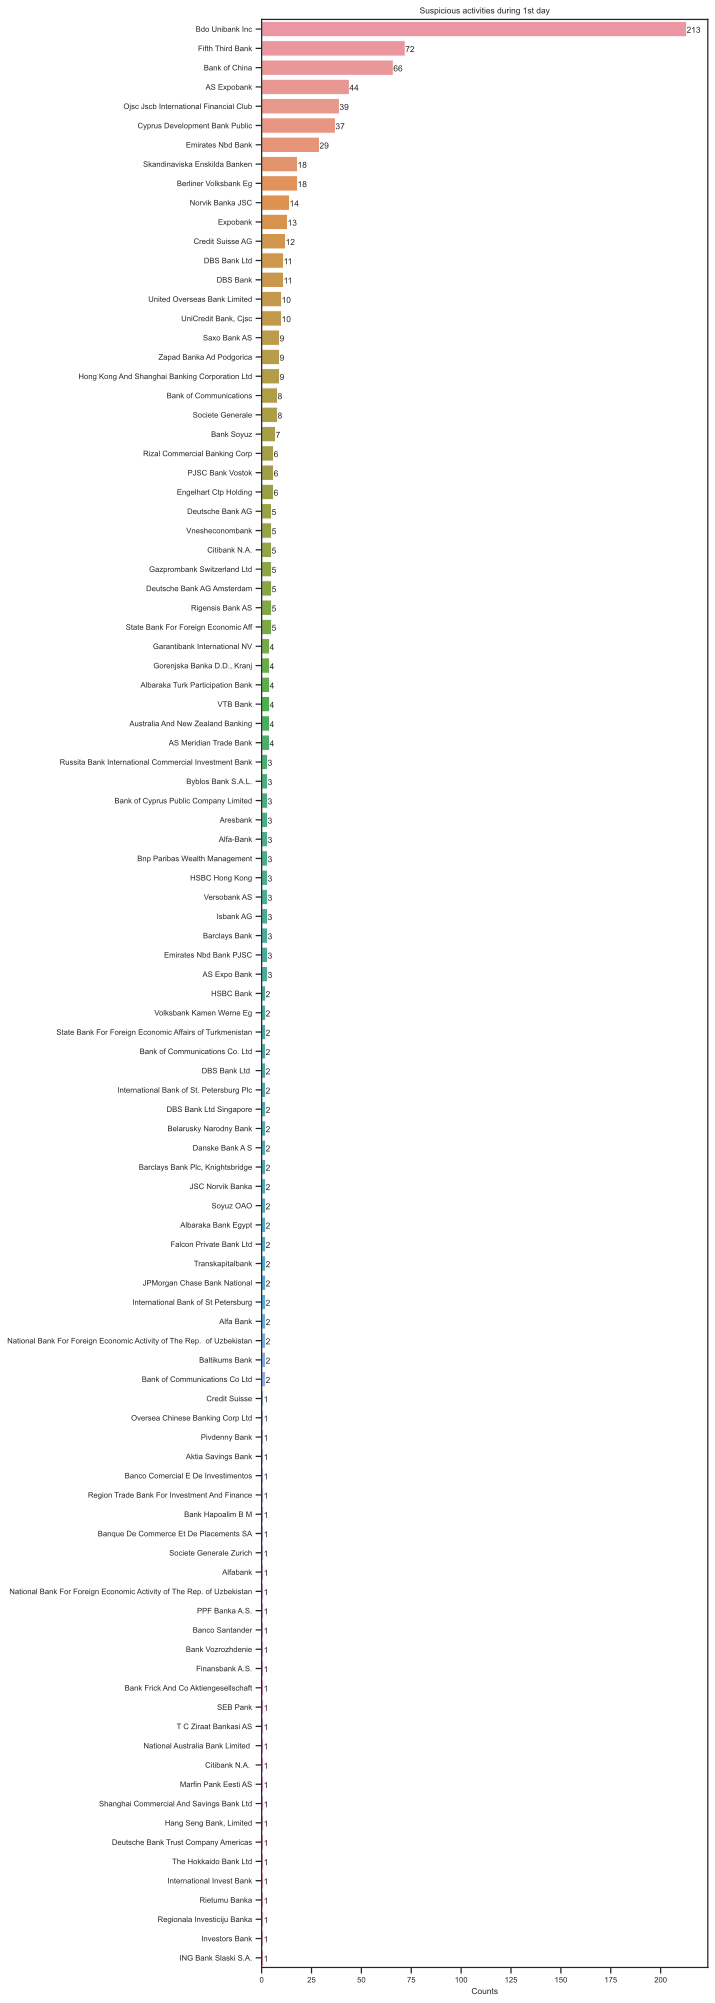

In [544]:
data = sar.loc[sar['Delta_time'].dt.days==0, :]['originator_bank']
count_graph(data, 'Suspicious activities during 1st day')

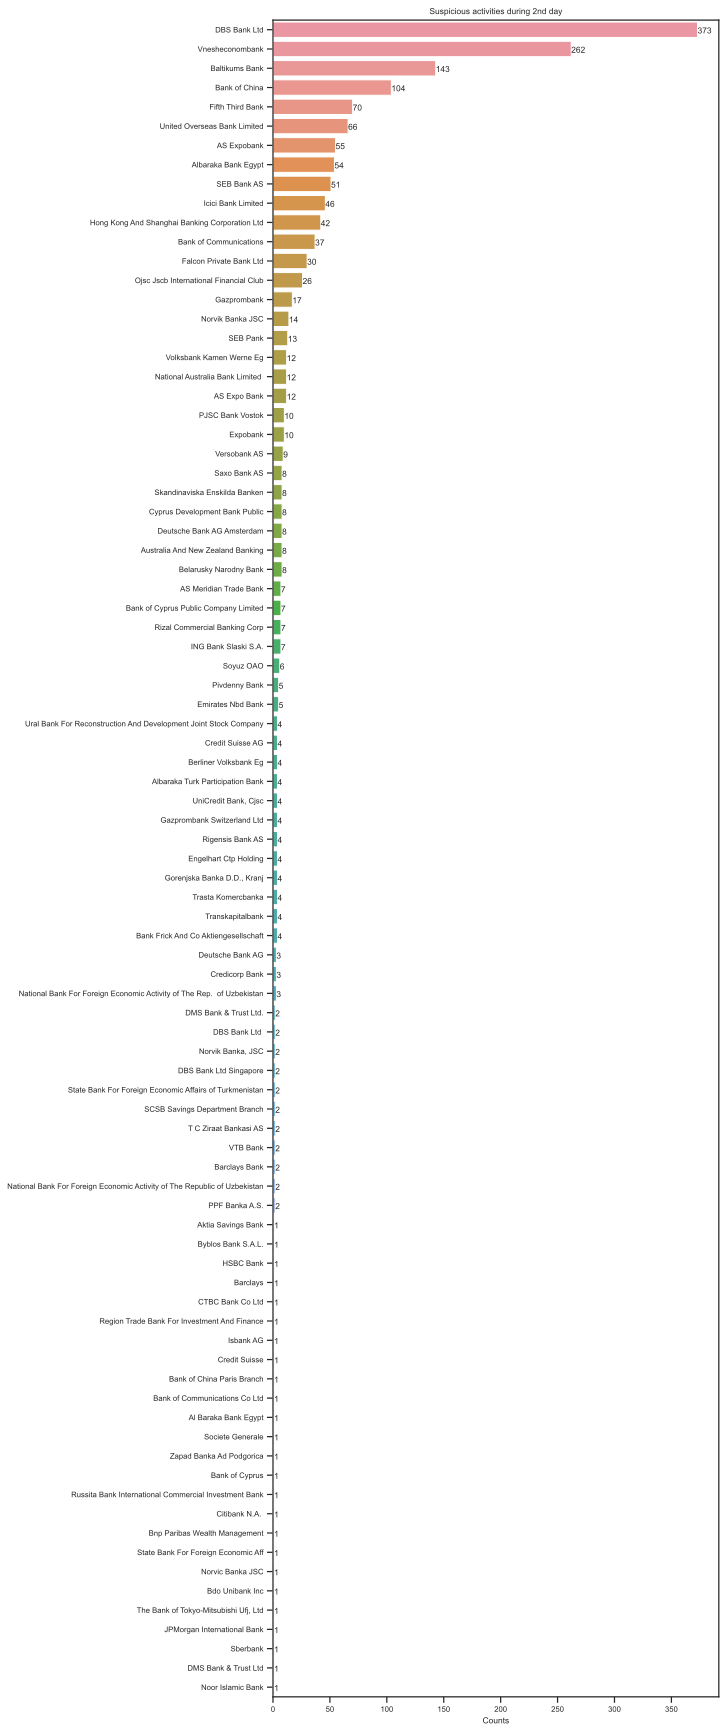

In [545]:
data = sar.loc[sar['Delta_time'].dt.days==1, :]['originator_bank']
count_graph(data, 'Suspicious activities during 2nd day')

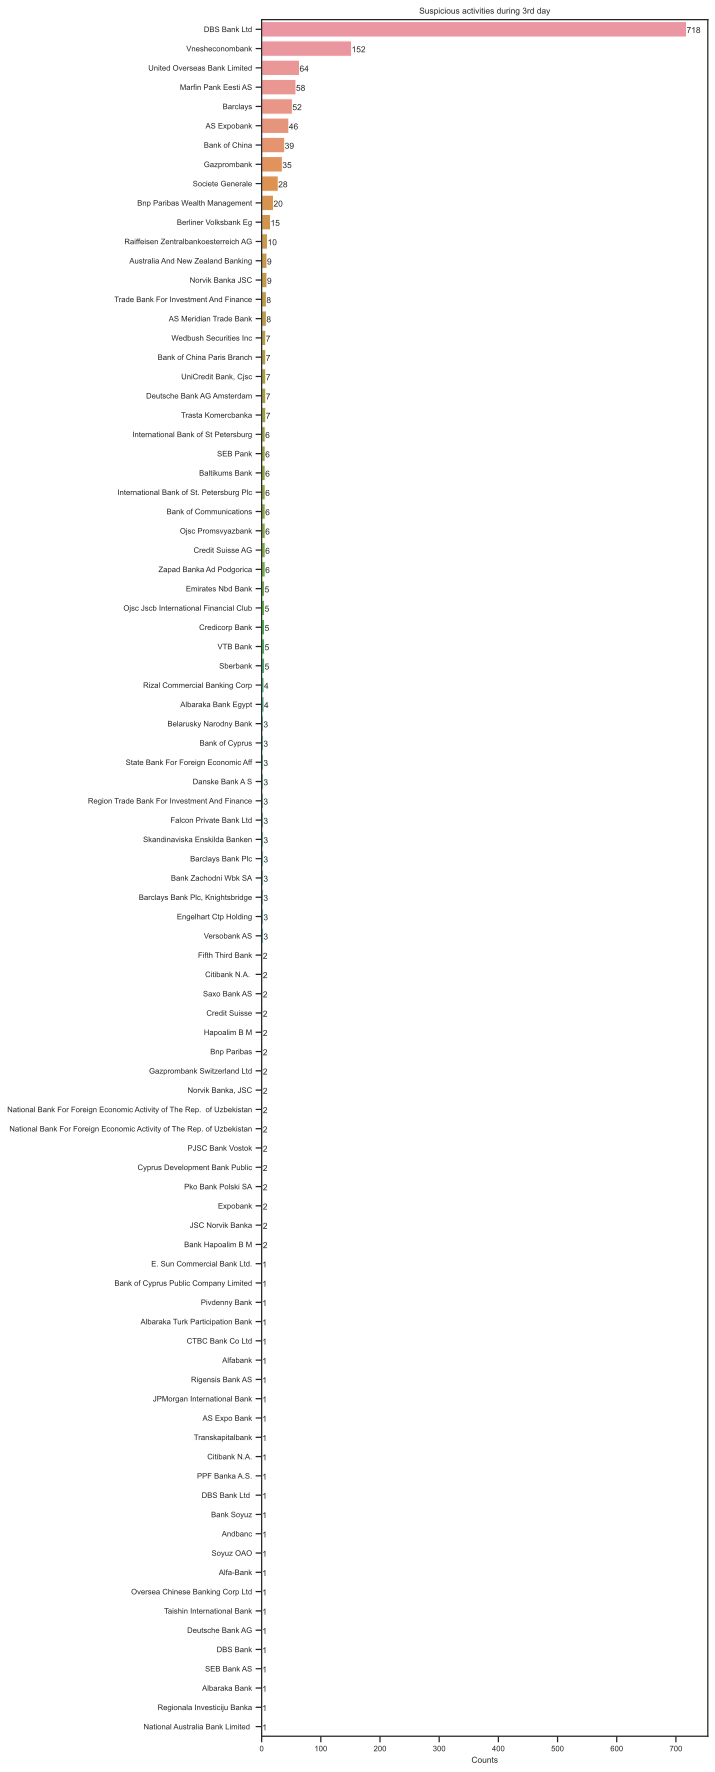

In [546]:
data = sar.loc[sar['Delta_time'].dt.days==2, :]['originator_bank']
count_graph(data, 'Suspicious activities during 3rd day')

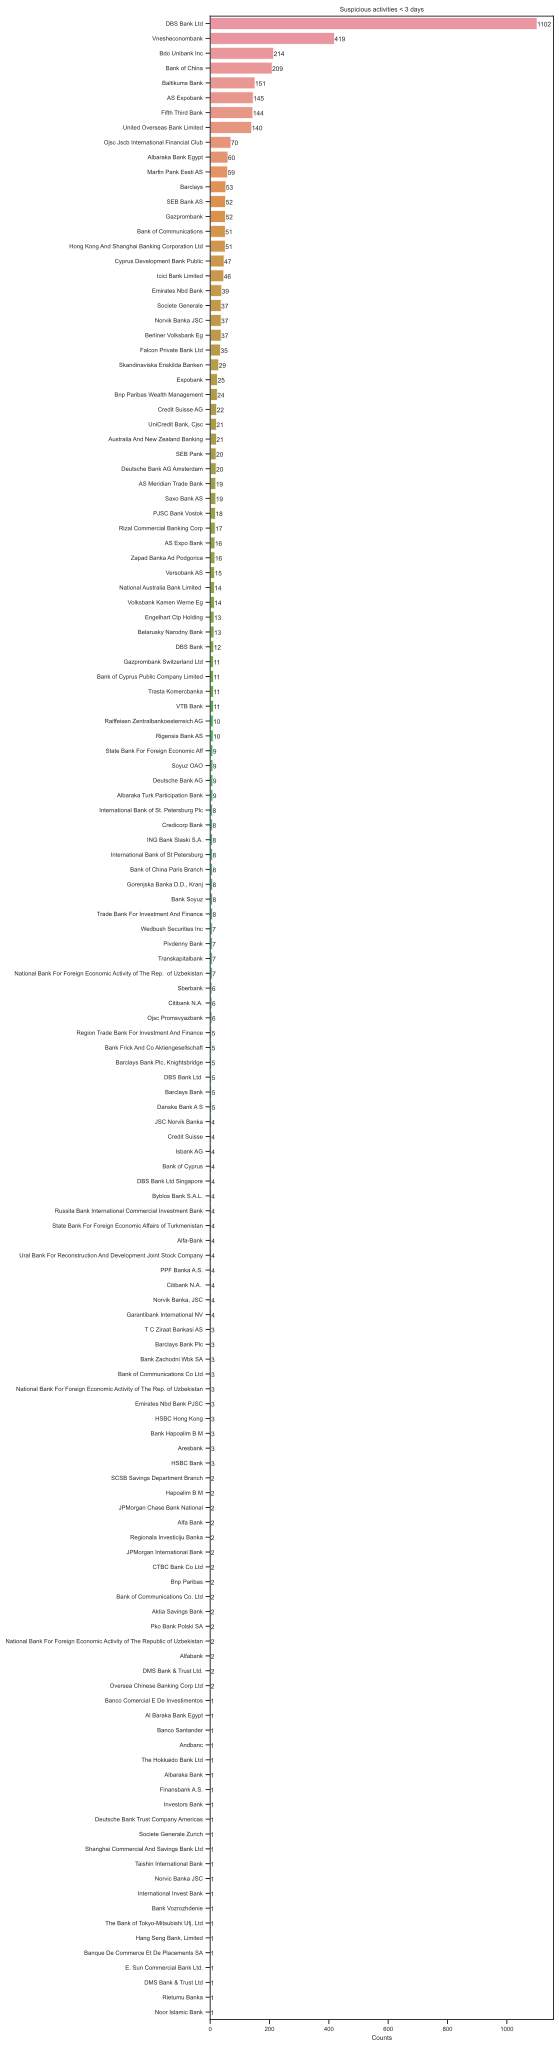

In [570]:
data = sar.loc[sar['Delta_time'].dt.days < 3, :]['originator_bank']
count_graph(data, 'Suspicious activities < 3 days')

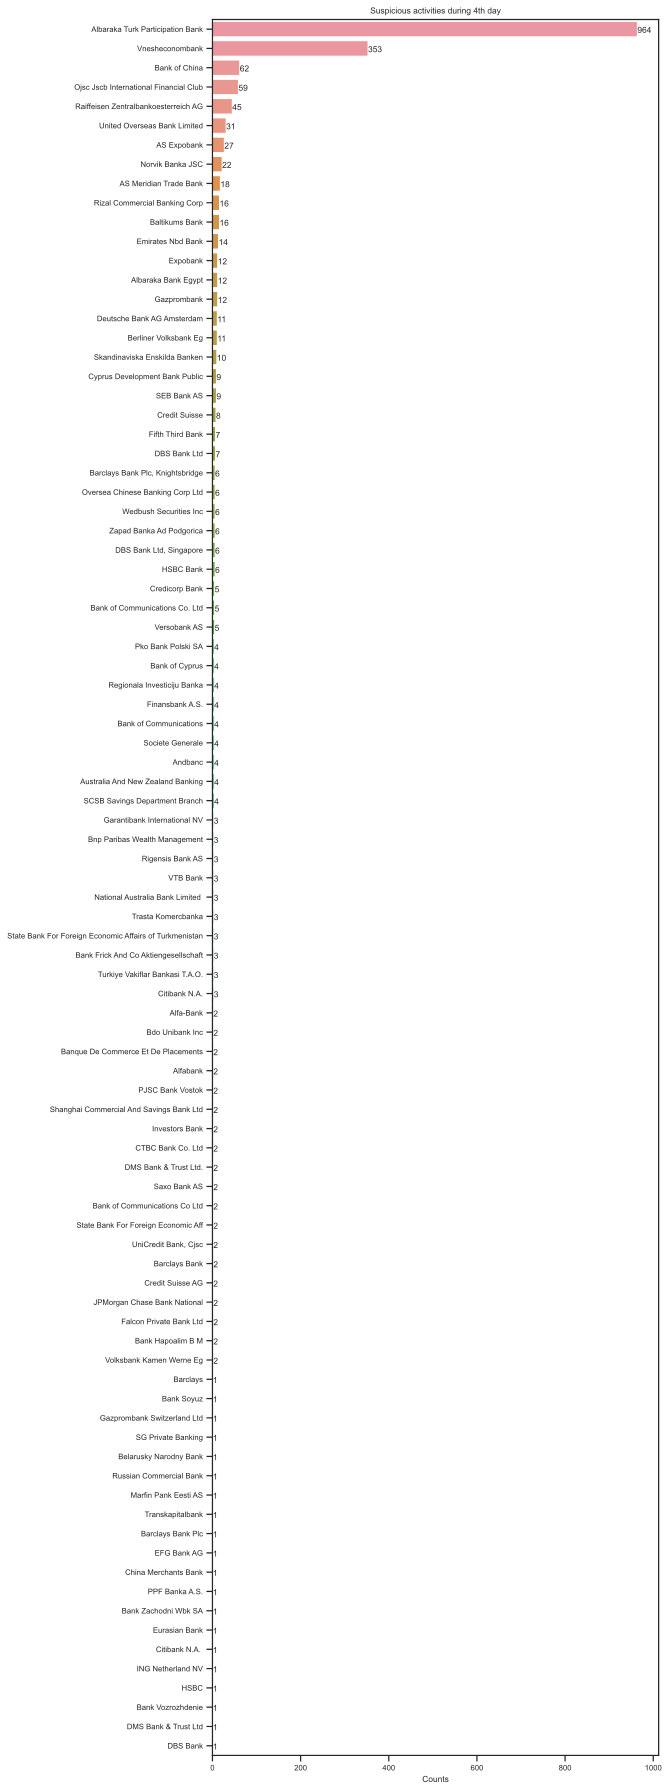

In [548]:
data = sar.loc[sar['Delta_time'].dt.days==3, :]['originator_bank']
count_graph(data, 'Suspicious activities during 4th day')

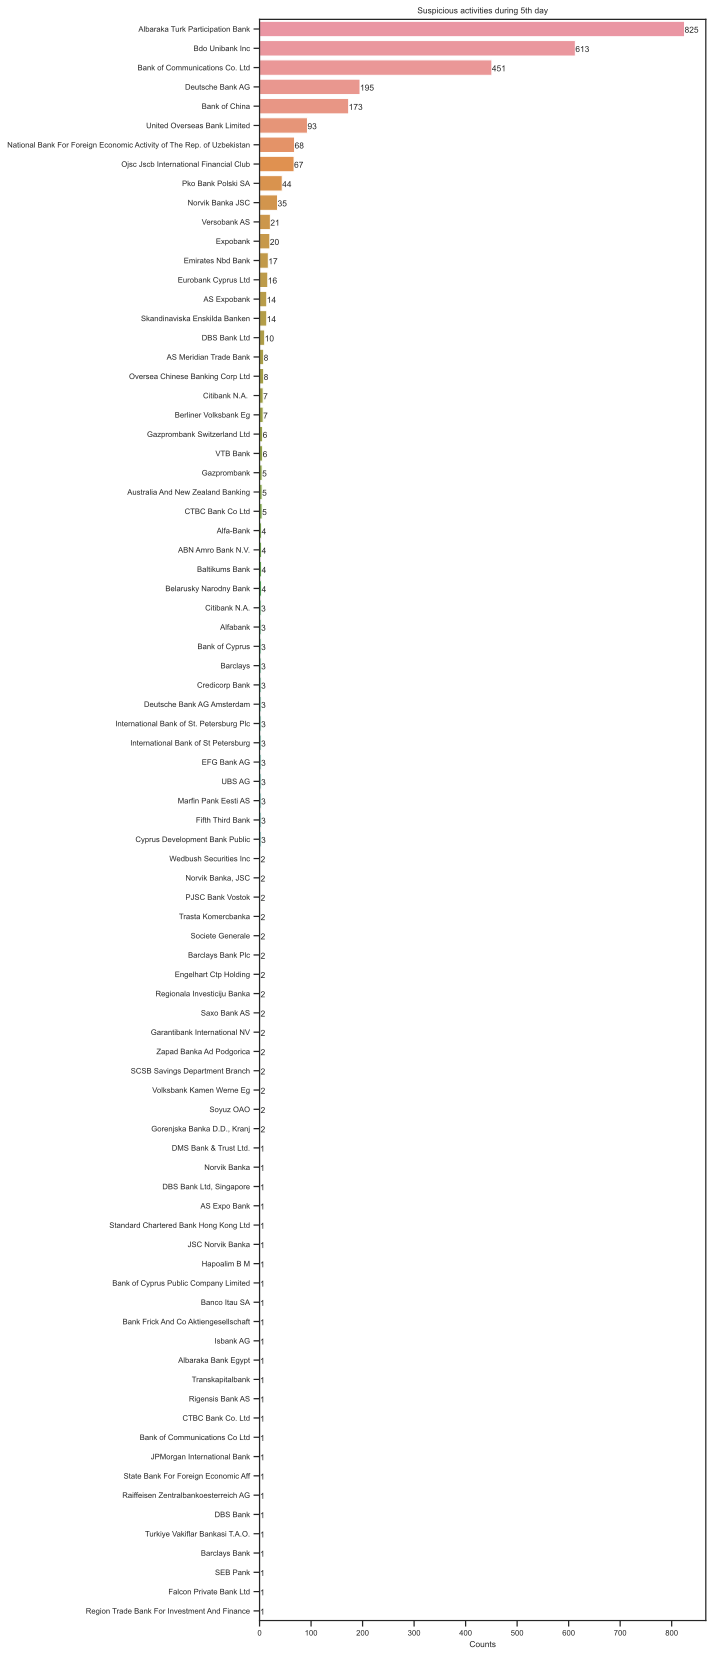

In [549]:
data = sar.loc[sar['Delta_time'].dt.days==4, :]['originator_bank']
count_graph(data, 'Suspicious activities during 5th day')

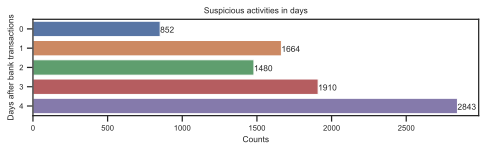

In [550]:
data = sar['Delta_time'].dt.days
count_graph(data, 'Suspicious activities in days', 'Days after bank transactions')

In [552]:
sar.columns

Index(['id', 'icij_sar_id', 'originator_bank_id', 'originator_bank',
       'originator_bank_country', 'originator_iso', 'number_transactions',
       'filer_org_name_id', 'filer_org_name', 'beneficiary_bank_id',
       'beneficiary_bank', 'beneficiary_bank_country', 'beneficiary_iso',
       'Transaction_amount', 'Price', 'Sender', 'Receiver', 'begin_date',
       'end_date', 'time', 'Transaction_amount_USD', 'amount_transactions',
       'Delta_time', 'Delta_amount'],
      dtype='object')

In [565]:
final_sar_columns = ['begin_date', 'end_date', 'time', 'Delta_time',
                     'originator_bank', 'filer_org_name', 'beneficiary_bank', 'Sender', 'Receiver',
                     'amount_transactions', 'Transaction_amount_USD', 'Delta_amount']
final_sar = sar[final_sar_columns]
final_sar.rename(columns={'begin_date':'first_bank_transaction_date',
                          'end_date':'last_bank_transaction_date',
                          'time': 'blockchain_date',
                          'Delta_time': 'days_after_bank_transactions',
                          'Sender': 'sender_blockchain',
                          'Receiver': 'receiver_blockchain',
                          'amount_transactions': 'bank_transaction_size',
                          'Transaction_amount_USD': 'blockchain_transaction_size',
                          'Delta_amount': 'amount_difference',
                         }, inplace=True)
final_sar['amount_difference_%'] = final_sar['blockchain_transaction_size'] / final_sar['bank_transaction_size']
final_sar[['blockchain_transaction_size', 'amount_difference', 'amount_difference_%']] = final_sar[['blockchain_transaction_size', 'amount_difference', 'amount_difference_%']].round(decimals=2)
final_sar.sort_values(by='days_after_bank_transactions')

,first_bank_transaction_date,last_bank_transaction_date,blockchain_date,days_after_bank_transactions,originator_bank,filer_org_name,beneficiary_bank,sender_blockchain,receiver_blockchain,bank_transaction_size,blockchain_transaction_size,amount_difference,amount_difference_%
60,2015-03-18,2015-03-18,2015-03-18,0 days,"UniCredit Bank, Cjsc",The Bank of New York Mellon Corp.,Credit Suisse AG,1EjcFUsTxw2KF3xXp4NonW2vneiUqhDrLD,14cyGuNfsAdjbR121uHgDsgCraiVH4bQt8,1762600.00,1675349.30,-87250.70,0.95
7492,2015-10-07,2015-10-07,2015-10-07,0 days,AS Expobank,The Bank of New York Mellon Corp.,Credit Suisse AG,3FhWzKn8yU4s1ZTWm4kyHVS59GVKsVncCr\n3KR3WFLeW2...,32GxivQN3VKtVEtgsH5uTWfXd5b2LkXyUZ,7185378.27,7287245.93,101867.66,1.01
1128,2017-04-20,2017-08-15,2017-04-20,0 days,Berliner Volksbank Eg,The Bank of New York Mellon Corp.,Raiffeisen Bank International Ag,1BFhGnbmi9vDLF5izcER5M7z2BkWSXavZi,18Q1LN64wWaK6AU895WUXyiPxnqvXKtY6a,2289240.00,2244579.32,-44660.68,0.98
1123,2017-04-20,2017-08-15,2017-04-20,0 days,Berliner Volksbank Eg,The Bank of New York Mellon Corp.,Raiffeisen Bank International Ag,18Q1LN64wWaK6AU895WUXyiPxnqvXKtY6a,1AWkbk1XVPmWbF9C2jM8YhwmxWUk2Yzqz2,2289240.00,2205411.76,-83828.24,0.96
7917,2015-07-06,2015-08-17,2015-08-17,0 days,AS Expobank,The Bank of New York Mellon Corp.,Credit Suisse AG,1BbfiJMDrApuoWjCC6X1Wt4UGMwaHHTT57,19dheUaAfemp4tKWLTtCjPXcp1FuKfwQp4,999999.99,1040754.49,40754.50,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,2016-01-14,2016-01-20,2016-01-24,4 days,Albaraka Turk Participation Bank,The Bank of New York Mellon Corp.,Baltikums Bank,1UGrL7sjpnytJPLqEwfiJT3w6gVxMBnb2,1FUh7nxiQpZwmwi1A8kvSZqijKNzdNNzof,1838624.00,1760836.40,-77787.60,0.96
12603,2016-01-14,2016-01-20,2016-01-24,4 days,Albaraka Turk Participation Bank,The Bank of New York Mellon Corp.,Baltikums Bank,1FUh7nxiQpZwmwi1A8kvSZqijKNzdNNzof,13Q3qUL7ekfuT5GLGpgBSN7oQBW6Zzxzki,1838624.00,1760560.54,-78063.46,0.96
12602,2016-01-14,2016-01-20,2016-01-24,4 days,Albaraka Turk Participation Bank,The Bank of New York Mellon Corp.,Baltikums Bank,13Q3qUL7ekfuT5GLGpgBSN7oQBW6Zzxzki,13DDxTUMR4uSxACvBdzZmKtY1RuJcBWDJS,1838624.00,1760245.29,-78378.71,0.96
12609,2016-01-14,2016-01-20,2016-01-24,4 days,Albaraka Turk Participation Bank,The Bank of New York Mellon Corp.,Baltikums Bank,13NSRT8EVw6P5ZK1e1mve8gtskuR5BHa5H,1LLqMXnxbm2Aj4mWK8o9PavSAu3AE73qm1,1838624.00,1762246.72,-76377.28,0.96


In [566]:
with pd.ExcelWriter("SAR_with_cryptocurrency.xlsx") as file:
    write_data = final_sar.loc[final_sar['days_after_bank_transactions'].dt.days < 3, :]
    write_data.to_excel(file, sheet_name=f'Sum_SA_during_first_3_days', index=False)
    write_data = final_sar.loc[final_sar['days_after_bank_transactions'].dt.days < 5, :]
    write_data.to_excel(file, sheet_name=f'Sum_SA_during_first_5_days', index=False)
    for day in range(5):
        write_data = final_sar.loc[final_sar['days_after_bank_transactions'].dt.days==day, :]
        write_data.to_excel(file, sheet_name=f'SA_during_{day+1}th_day', index=False)